# IBM HR Analytics Employee Attrition Modeling .

### DESCRIPTION

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

### Data Dictionary

    Age: Age of employee
    Attrition: Employee attrition status
    Department: Department of work
    DistanceFromHome
    Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
    EducationField
    EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
    JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
    MaritalStatus
    MonthlyIncome
    NumCompaniesWorked: Number of companies worked prior to IBM
    WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
    YearsAtCompany: Current years of service in IBM

### Analysis Task:

- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.

### - Exploratory data analysis

    Find the age distribution of employees in IBM
    Explore attrition by age
    Explore data for Left employees
    Find out the distribution of employees by the education field
    Give a bar chart for the number of married and unmarried employees
- Build up a logistic regression model to predict which employees are likely to attrite.




In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [22]:
data_df = pd.read_csv("C:/Users/smrit/OneDrive/Desktop/1576148666_ibmattritiondata/IBM Attrition Data.csv")
data_df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [24]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


In [25]:
data_df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [26]:
data_df = data_df[['Age','Attrition','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction','JobSatisfaction','MaritalStatus','MonthlyIncome','NumCompaniesWorked','WorkLifeBalance','YearsAtCompany']]

#### Find the age distribution of employees in IBM

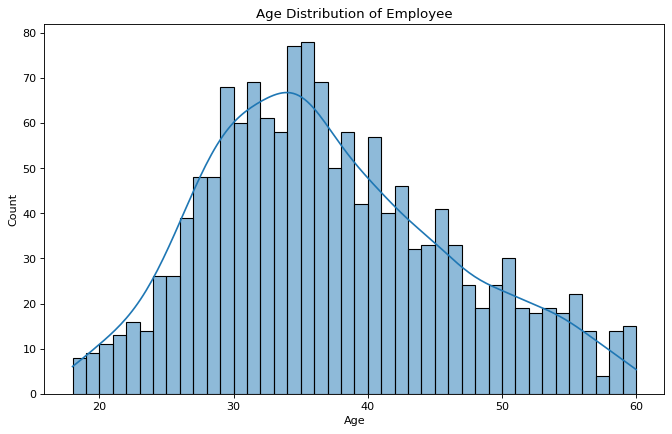

In [28]:
# histogram for age

plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=data_df, x='Age', bins=42, kde=True).set_title('Age Distribution of Employee');

#### Explore attrition by age

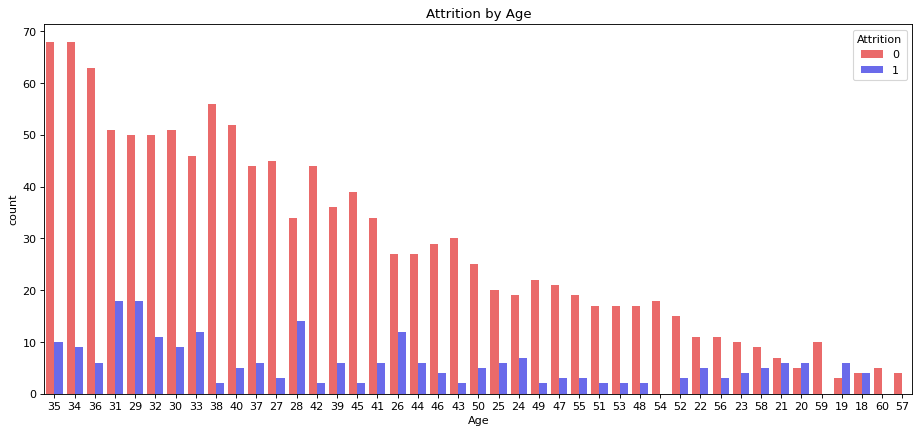

In [70]:
plt.figure(figsize = (14,6), dpi=80)
sns.countplot(data=data_df, x='Age',hue='Attrition', order = data_df['Age'].value_counts().index, palette='seismic_r').set_title('Attrition by Age');

#### Explore data for Left employees

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


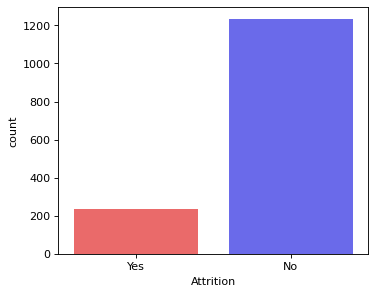

In [33]:
print(data_df.groupby('Attrition')['Attrition'].count())

plt.figure(figsize=(5,4), dpi=80)
sns.countplot(data=data_df, x='Attrition', palette='seismic_r');

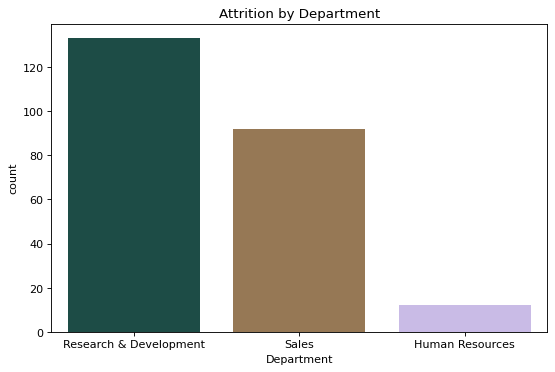

In [34]:
# print(data_df[(data_df['Attrition'] == 'Yes')].groupby('Department')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=data_df[(data_df['Attrition'] == 'Yes')], x='Department', palette='cubehelix', order = data_df['Department']
              .value_counts().index).set_title('Attrition by Department');

In [37]:
agerange = []
for age in data_df["Age"]:
    if age >= 18 and age < 24:
        agerange.append("18-24")
    elif age >= 25 and age < 31:
        agerange.append("25-31")
    elif age >= 32 and age < 38:
        agerange.append("32-38")
    elif age >= 39 and age < 45:
        agerange.append("39-45")
    elif age >= 46 and age < 52:
        agerange.append("46-52")
    elif age >= 53 and age < 59:
        agerange.append("53-59")
    else:
        agerange.append("60-66")
       
data_df["AgeRange"] = agerange

In [38]:
data_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,AgeRange
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,39-45
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,46-52
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,32-38
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,32-38
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,25-31


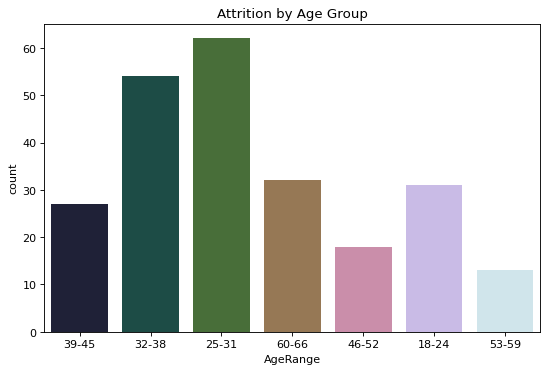

In [39]:
# print(data_df[(data_df['Attrition'] == 'Yes')].groupby('AgeRange')['AgeRange'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=data_df[(data_df['Attrition'] == 'Yes')], x='AgeRange', palette='cubehelix').set_title('Attrition by Age Group');

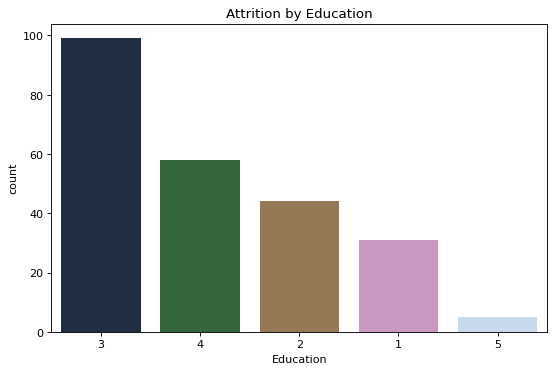

In [40]:
# print(data_df[(data_df['Attrition'] == 'Yes')].groupby('Education')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=data_df[(data_df['Attrition'] == 'Yes')], x='Education', order=data_df['Education'].value_counts().index, 
              palette='cubehelix').set_title('Attrition by Education');

Education:
1 - Below College, 2 - College, 3 - Bachelor, 4 - Master, 5 - Doctor

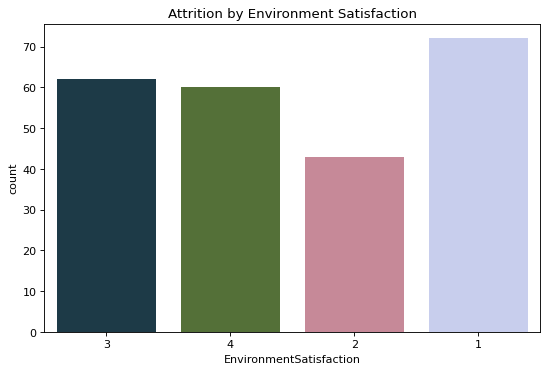

In [42]:
# print(data_df[(data_df['Attrition'] == 'Yes')].groupby('EnvironmentSatisfaction')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=data_df[(data_df['Attrition'] == 'Yes')], x='EnvironmentSatisfaction', order=data_df['EnvironmentSatisfaction']
              .value_counts().index, palette='cubehelix').set_title('Attrition by Environment Satisfaction');

Environment Satisfaction:
1 - Low, 2 - Medium, 3 - High, 4 - Very High

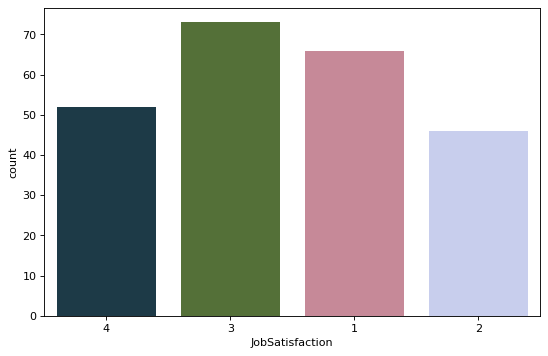

In [43]:
# print(data_df[(data_df['Attrition'] == 'Yes')].groupby('JobSatisfaction')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=data_df[(data_df['Attrition'] == 'Yes')], x='JobSatisfaction', order=data_df['JobSatisfaction'].value_counts().index, palette='cubehelix');

Job Satisfaction:


1 - Low, 2 - Medium, 3 - High, 4 - Very High

#### Find out the distribution of employees by the education field

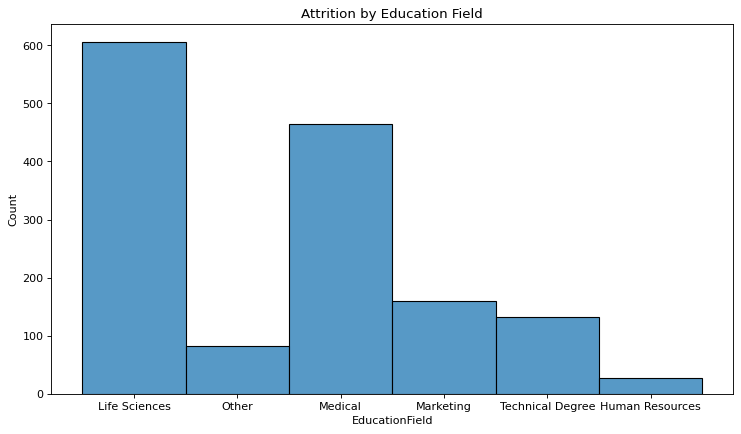

In [44]:
# print(data_df[(data_df['Attrition'] == 'Yes')].groupby('EducationField')['EducationField'].count().sort_values(ascending=False))

plt.figure(figsize=(11,6), dpi=80)
sns.histplot(data=data_df, x='EducationField').set_title('Attrition by Education Field');

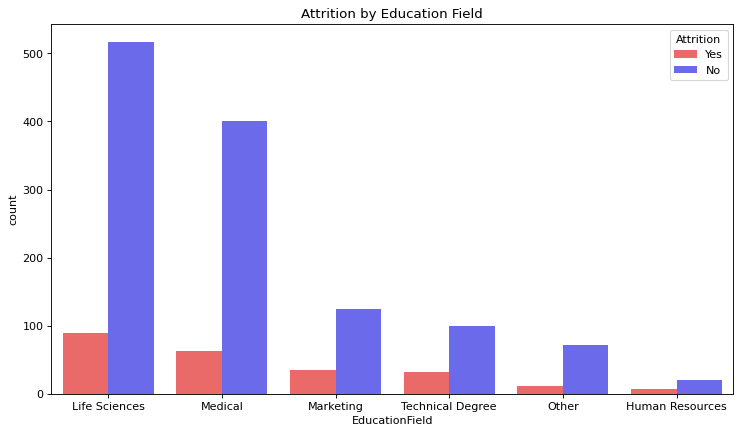

In [45]:
plt.figure(figsize=(11,6), dpi=80)
sns.countplot(data=data_df, x='EducationField', hue='Attrition', order = data_df['EducationField'].value_counts().index, palette='seismic_r').set_title('Attrition by Education Field');

#### Give a bar chart for the number of married and unmarried employees

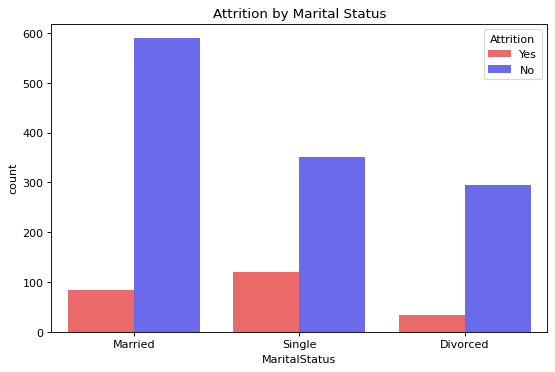

In [46]:
# print(data_df[(data_df['Attrition'] == 'Yes')].groupby('MaritalStatus')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=data_df, x='MaritalStatus', hue='Attrition', order=data_df['MaritalStatus'].value_counts().index, palette='seismic_r').set_title('Attrition by Marital Status');

In [49]:
data_df.dtypes

Age                         int64
Attrition                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
AgeRange                   object
dtype: object

In [47]:
data_df['Attrition'].replace('Yes', 1, inplace=True)
data_df['Attrition'].replace('No', 0, inplace=True)

In [50]:
data_df['Department'].replace('Human Resources', 1, inplace=True)
data_df['Department'].replace('Research & Development', 2, inplace=True)
data_df['Department'].replace('Sales', 3, inplace=True)

In [51]:
data_df['EducationField'].replace('Human Resources', 1, inplace=True)
data_df['EducationField'].replace('Life Sciences', 2, inplace=True)
data_df['EducationField'].replace('Marketing', 3, inplace=True)
data_df['EducationField'].replace('Medical', 4, inplace=True)
data_df['EducationField'].replace('Other', 5, inplace=True)
data_df['EducationField'].replace('Technical Degree', 6, inplace=True)

In [52]:
data_df['MaritalStatus'].replace('Divorced', 1, inplace=True)
data_df['MaritalStatus'].replace('Married', 2, inplace=True)
data_df['MaritalStatus'].replace('Single', 3, inplace=True)

In [53]:
data_df.dtypes

Age                         int64
Attrition                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
AgeRange                   object
dtype: object

#### Build up a logistic regression model to predict which employees are likely to attrite.

In [54]:
x = data_df.drop(['Attrition', 'AgeRange', 'DistanceFromHome', 'NumCompaniesWorked', 'WorkLifeBalance'], axis=1)

In [55]:
y = data_df[['Attrition']]

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)

# check the accuracy on the training set
print('Accuracy =', lr.score(x_train, y_train)*100,'%');

C:\Users\smrit\miniconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 84.8639455782313 %


In [59]:
lr_y_pred = lr.predict(x_test)

In [60]:
pd.DataFrame(lr_y_pred).head()

,0
0,0
1,0
2,0
3,0
4,0


In [61]:
prob = lr.predict_proba(x_test)
print(prob)

[[0.64401871 0.35598129]
 [0.87568542 0.12431458]
 [0.83725262 0.16274738]
 [0.74407114 0.25592886]
 [0.92050452 0.07949548]
 [0.94351006 0.05648994]
 [0.79969895 0.20030105]
 [0.86214789 0.13785211]
 [0.98244925 0.01755075]
 [0.7383701  0.2616299 ]
 [0.92048016 0.07951984]
 [0.6302705  0.3697295 ]
 [0.75003248 0.24996752]
 [0.94206765 0.05793235]
 [0.95126831 0.04873169]
 [0.80208465 0.19791535]
 [0.98220882 0.01779118]
 [0.94677249 0.05322751]
 [0.57393254 0.42606746]
 [0.89169325 0.10830675]
 [0.79289085 0.20710915]
 [0.979896   0.020104  ]
 [0.63351181 0.36648819]
 [0.95926839 0.04073161]
 [0.99469412 0.00530588]
 [0.88853801 0.11146199]
 [0.77058581 0.22941419]
 [0.90518476 0.09481524]
 [0.86080944 0.13919056]
 [0.89500823 0.10499177]
 [0.83884417 0.16115583]
 [0.91470106 0.08529894]
 [0.61869563 0.38130437]
 [0.90428174 0.09571826]
 [0.82548204 0.17451796]
 [0.88462203 0.11537797]
 [0.9618798  0.0381202 ]
 [0.90966695 0.09033305]
 [0.87994337 0.12005663]
 [0.9256763  0.0743237 ]


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Test Accuracy Score:', accuracy_score(y_test, lr_y_pred)*100, '%\n')

print('----------------------Classification Report----------------------\n', classification_report(y_test, lr_y_pred))
print('----------------------Confusion Matrix----------------------\n', confusion_matrix(y_test, lr_y_pred))

Test Accuracy Score: 82.99319727891157 %

----------------------Classification Report----------------------
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       243
           1       0.67      0.04      0.07        51

    accuracy                           0.83       294
   macro avg       0.75      0.52      0.49       294
weighted avg       0.80      0.83      0.76       294

----------------------Confusion Matrix----------------------
 [[242   1]
 [ 49   2]]


In [63]:
# add random values to check the proabily of attrition of the employee

pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8
0,-0.418729,-0.49217,1.064028,-0.941634,1.171567,-1.567761,-0.135583,-0.719756,0.479707
1,2.463546,-0.49217,1.064028,0.578423,1.171567,1.158243,1.250902,0.835932,0.316237
2,1.354979,-0.49217,1.064028,0.578423,0.258537,-1.567761,-0.135583,0.003093,1.297057
3,-0.197016,-0.49217,-0.904968,1.338452,-1.567524,1.158243,1.250902,-0.606178,-0.664583
4,-0.086159,-0.49217,0.079530,1.338452,0.258537,-0.659093,-0.135583,-0.279586,0.316237


In [65]:
input = [[-0.657246, 0.813029, -0.503547, -0.878027, -0.909680, 1.161409, -1.560113, -0.144032, -0.908062]]
print(lr.predict_proba(input))

[[0.91030418 0.08969582]]
